In [3]:
%pip install numpy pandas matplotlib seaborn statsmodels plotly scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [5]:
train=pd.read_csv('train.csv')

In [6]:
test=pd.read_csv('test.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [9]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [10]:
train.dtypes.value_counts()

float64    561
int64        1
object       1
Name: count, dtype: int64

In [11]:
test.dtypes.value_counts()

float64    561
int64        1
object       1
Name: count, dtype: int64

In [12]:
print('Null values in train are {}'.format(train.isnull().values.sum()))
print('Null values in test are {}'.format(test.isnull().values.sum()))

Null values in train are 0
Null values in test are 0


In [13]:
print('duplicates in train: {}'.format(sum(train.duplicated())))
print('duplicates in test : {}'.format(sum(test.duplicated())))

duplicates in train: 0
duplicates in test : 0


In [14]:
def show_basics(data):
    a = pd.DataFrame()
    a['Missing Value'] = train.isnull().sum()
    a['No. of unique Value'] = train.nunique()
    a['dtype'] = train.dtypes
    return a
show_basics(train)

,Missing Value,No. of unique Value,dtype
tBodyAcc-mean()-X,0,7347,float64
tBodyAcc-mean()-Y,0,7352,float64
tBodyAcc-mean()-Z,0,7349,float64
tBodyAcc-std()-X,0,7349,float64
tBodyAcc-std()-Y,0,7351,float64
...,...,...,...
"angle(X,gravityMean)",0,7352,float64
"angle(Y,gravityMean)",0,7352,float64
"angle(Z,gravityMean)",0,7352,float64
subject,0,21,int64


In [15]:
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [16]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
Acc=0
Gyro=0
other=0
for i in train.columns:
    if 'Acc'in i:
        Acc=Acc+1
    elif 'Gyro'in i:
        Gyro=Gyro+1
    else:
        other=other+1
px.bar(x=['Accelerometer ','Gyroscope ','other'],y=[Acc,Gyro,other],color=[Acc,Gyro,other], title = 'Sensors importance')   

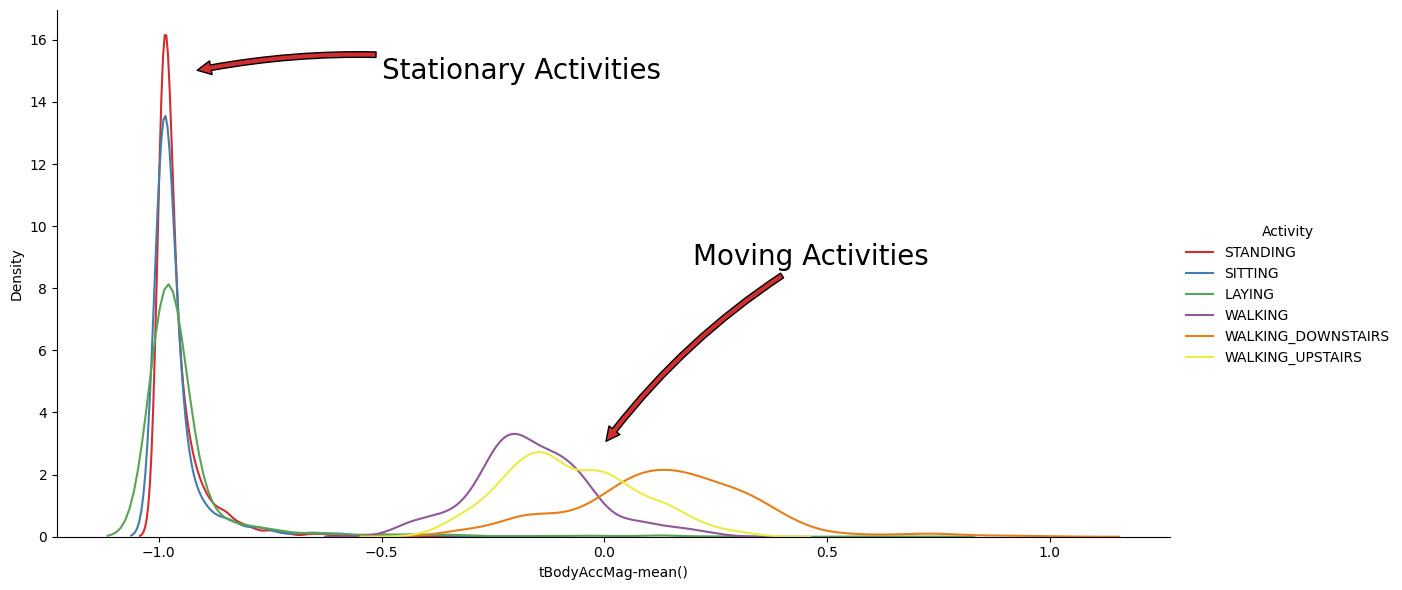

In [18]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.92,15), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [19]:
fig = px.box(train, y='tBodyAccMag-mean()', x="Activity",color="Activity",width=1000, title = 'Boxplot of tBodyAccMag-mean() feature across various Activities')
fig.show()

In [20]:
X_for_tsne = train.drop(['subject', 'Activity'], axis=1)

In [21]:
from sklearn.manifold import TSNE
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: total: 0 ns
Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.026s...
[t-SNE] Computed neighbors for 7352 samples in 1.612s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.094444
[t-SNE] KL divergence after 1000 iterations: 1.295431


<Axes: >

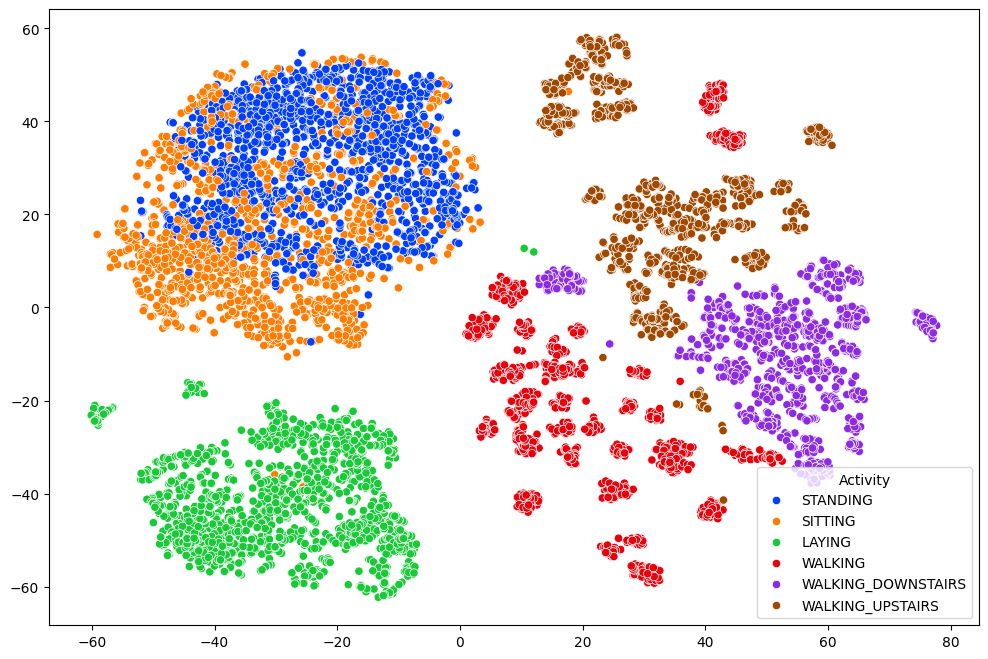

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

In [23]:
from sklearn.preprocessing import LabelEncoder
model_trans = LabelEncoder()
train['Activity'] = model_trans.fit_transform(train['Activity'])
test['Activity'] = model_trans.fit_transform(test['Activity'])

In [24]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

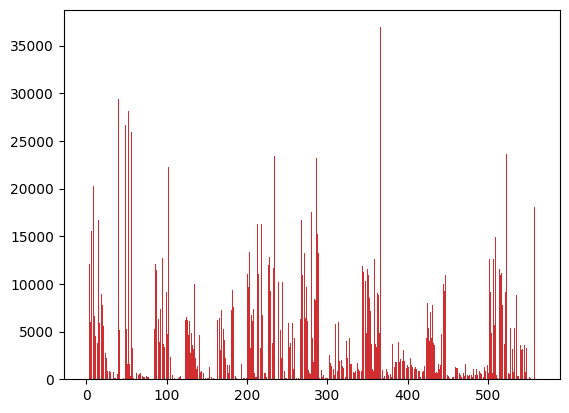

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
    
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
   
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9883025027203483
0.9524940617577197


In [27]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
  
# # define the evaluation method
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define the pipeline to evaluate
# model = LogisticRegression(solver='liblinear')
# fs = SelectKBest(score_func=f_classif)
# pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# # define the grid
# grid = dict()
# grid['anova__k'] = [i+1 for i in range(X_train.shape[1])]
# # define the grid search
# search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# # perform the search
# results = search.fit(X_train, y_train)
# # summarize best
# print('Best Mean Accuracy: %.3f' % results.best_score_)
# print('Best Config: %s' % results.best_params_)

In [28]:
model = LogisticRegression()
rfe = RFE(model,n_features_to_select= 50)
fit_train = rfe.fit(X_train, y_train)
fit_test = rfe.fit(X_test, y_test)

In [29]:
fit_train

RFE(estimator=LogisticRegression(), n_features_to_select=50)

In [30]:
features_train = fit_train.transform(X_train)
features_test = fit_test.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train , y_train)
print(lr.score(features_train, y_train))
print(lr.score(features_test, y_test))
features_50 =lr.score(features_test, y_test)

0.9721164309031556
0.9484221241940957


In [32]:
model = LogisticRegression()
rfe = RFE(model,n_features_to_select= 100)
fit_train = rfe.fit(X_train, y_train)
fit_test = rfe.fit(X_test, y_test)

In [33]:
fit_train

RFE(estimator=LogisticRegression(), n_features_to_select=100)

In [34]:
features_train = fit_train.transform(X_train)
features_test = fit_test.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train , y_train)
print(lr.score(features_train, y_train))

0.9843579978237215


In [36]:
yhat = lr.predict(features_test)
print(lr.score(features_test, y_test))
features_100 =lr.score(features_test, y_test)

0.9589412962334578


In [37]:
model = LogisticRegression()
rfe = RFE(model,n_features_to_select= 200)
fit_train = rfe.fit(X_train, y_train)
fit_test = rfe.fit(X_test, y_test)

In [38]:
fit_train

RFE(estimator=LogisticRegression(), n_features_to_select=200)

In [39]:
features_train = fit_train.transform(X_train)
features_test = fit_test.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train , y_train)
print(lr.score(features_train, y_train))

0.9891186071817193


In [41]:
yhat = lr.predict(features_test)
print(lr.score(features_test, y_test))
features_200 =lr.score(features_test, y_test)

0.9609772650152698


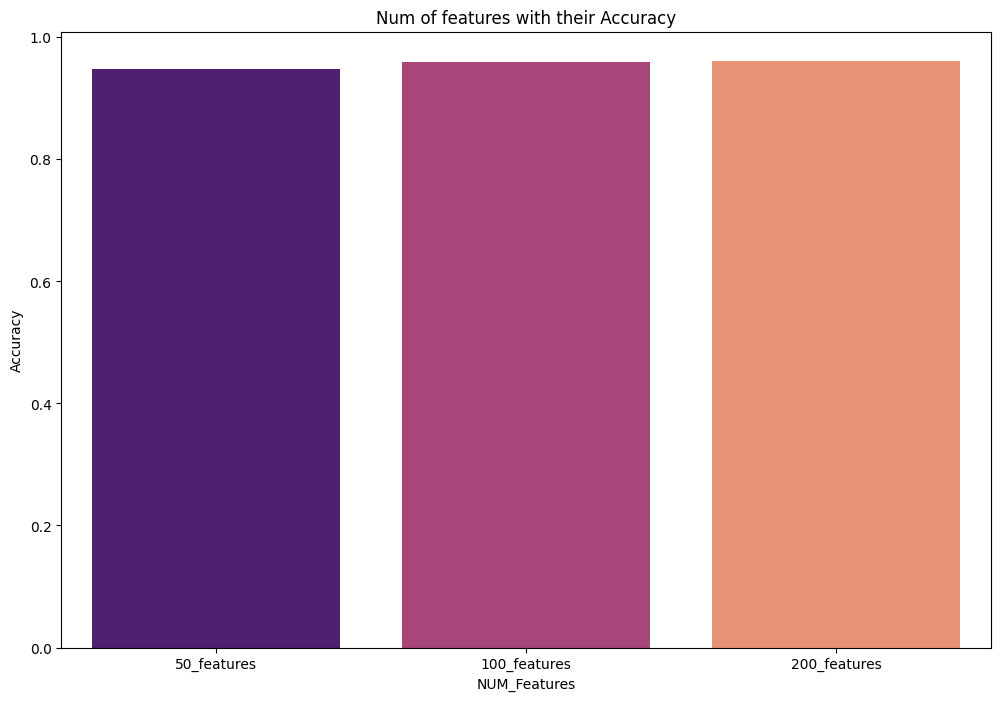

In [42]:
Acc = [features_50 , features_100 , features_200]
dataPerf = pd.DataFrame(data={'NUM_Features': ['50_features', '100_features', '200_features'] ,'Accuracy': Acc})

plt.figure(figsize=(12, 8))
sns.barplot(x="NUM_Features", y="Accuracy", data=dataPerf, palette="magma")
plt.title('Num of features with their Accuracy')
plt.show()

In [43]:
def classification_task( model,features_train, y_train ,features_test ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({'Train_Score':model.score(features_train, y_train),"Test_Score":model.score(features_test, y_test),
                       "Precision_Score":precision_score(y_test,predic, average = 'macro'),"Recall_Score":recall_score(y_test,predic, average = 'macro'),
                       "F1_Score":f1_score(y_test,predic, average = 'macro') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [44]:
KNN = KNeighborsClassifier()
KNN.fit(features_train,y_train)
pred_1 = KNN.predict(features_test)

In [45]:
Eval_KNN= classification_task(KNN,features_train, y_train ,features_test ,y_test,pred_1,"KNN" )
Eval_KNN

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
KNN,0.985446,0.918561,0.922236,0.915601,0.916836,0.918561


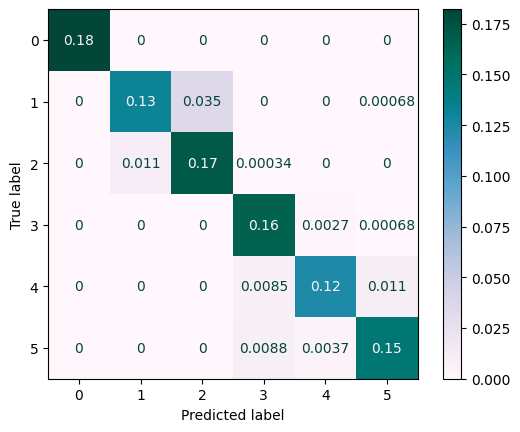

In [46]:
conf = confusion_matrix(y_test, pred_1 ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [47]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(features_train,y_train)
pred_ = Decision_Tree.predict(features_test)

In [48]:
Eval_dec= classification_task(Decision_Tree,features_train, y_train ,features_test ,y_test,pred_1,"Decision Tree" )
Eval_dec

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Decision Tree,1.0,0.864269,0.922236,0.915601,0.916836,0.918561


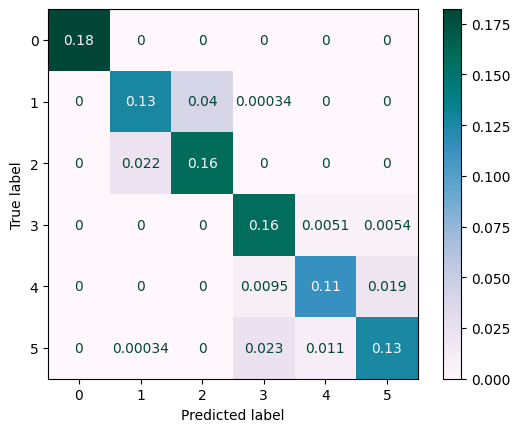

In [49]:
conf = confusion_matrix(y_test, pred_ ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [50]:
Random_Forest= RandomForestClassifier()
Random_Forest.fit(features_train,y_train)
pred_rand = Random_Forest.predict(features_test)

In [51]:
Eval_fores= classification_task(Random_Forest,features_train, y_train ,features_test ,y_test,pred_rand,"Random Forest" )
Eval_fores

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest,1.0,0.91415,0.916127,0.911432,0.912812,0.91415


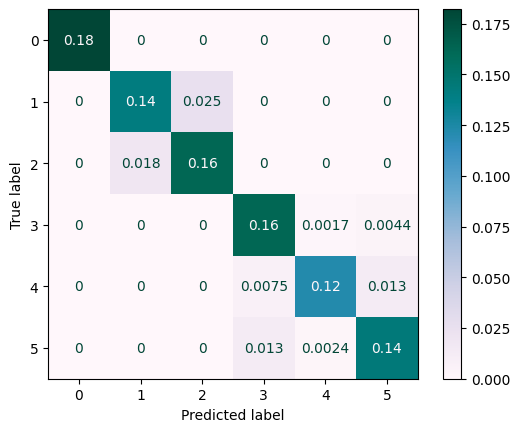

In [52]:
conf = confusion_matrix(y_test, pred_rand ,normalize="all",)
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [53]:
xgb = XGBClassifier()
xgb.fit(features_train,y_train)
pred = xgb.predict(features_test)

In [54]:
Eval_XGB= classification_task(xgb,features_train, y_train ,features_test ,y_test,pred,"XGB" )
Eval_XGB

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
XGB,1.0,0.938242,0.940553,0.93622,0.937369,0.938242


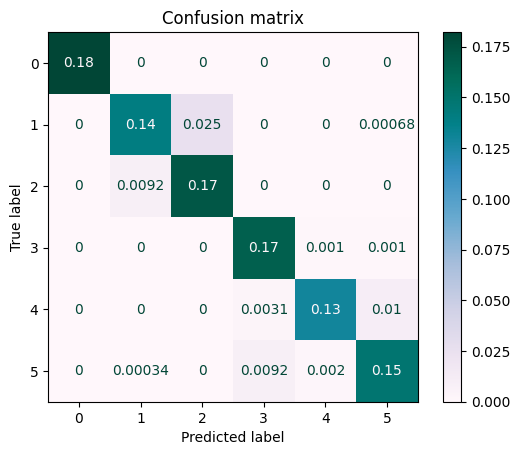

In [55]:
conf = confusion_matrix(y_test, pred ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)
plt.title('Confusion matrix')
plt.show()

In [56]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.85      0.89       491
           2       0.87      0.95      0.91       532
           3       0.93      0.99      0.96       496
           4       0.98      0.91      0.94       420
           5       0.93      0.93      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [57]:
clf = GaussianNB()
clf.fit(features_train,y_train)
pred_clf = clf.predict(features_test)

In [58]:
Eval_clf= classification_task(clf,features_train, y_train ,features_test ,y_test,pred_clf,"Naive Bayes" )
Eval_clf

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Naive Bayes,0.89105,0.876145,0.890912,0.871339,0.870359,0.876145


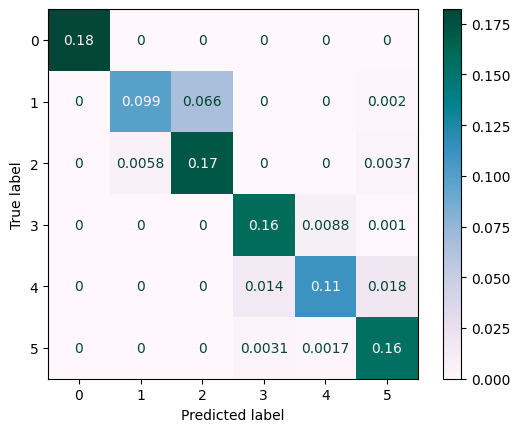

In [59]:
conf = confusion_matrix(y_test, pred_clf ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [60]:
lr = LogisticRegression()
lr.fit(features_train, y_train)
pred_2 = lr.predict(features_test)

In [61]:
Eval_lr= classification_task(lr,features_train, y_train ,features_test ,y_test,pred_2,"logisitc regression" )
Eval_lr

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
logisitc regression,0.989119,0.960977,0.963759,0.960167,0.961053,0.960977


In [69]:
# Save the trained logistic regression model to a file
import joblib

# Save the model
joblib.dump(lr, "logistic_regression_model.joblib")
# loaded_model = joblib.load("logistic_regression_model.joblib")

['logistic_regression_model.joblib']

In [63]:
svc = SVC(random_state=0,C=0.7,kernel='rbf')
svc.fit(features_train, y_train)
pred_svc = svc.predict(features_test)

In [64]:
Eval_svc= classification_task(svc,features_train, y_train ,features_test ,y_test,pred_svc,"SVC" )
Eval_svc

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
SVC,0.980413,0.956905,0.958345,0.955723,0.956623,0.956905


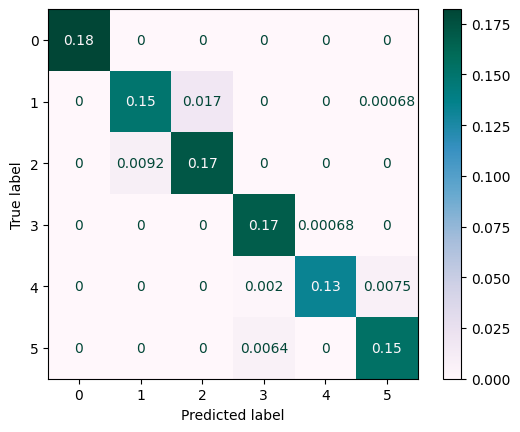

In [65]:
conf = confusion_matrix(y_test, pred_svc ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [66]:
pd.concat([Eval_KNN, Eval_dec , Eval_fores , Eval_XGB ,Eval_clf , Eval_lr, Eval_svc]) 

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
KNN,0.985446,0.918561,0.922236,0.915601,0.916836,0.918561
Decision Tree,1.000000,0.864269,0.922236,0.915601,0.916836,0.918561
Random Forest,1.000000,0.914150,0.916127,0.911432,0.912812,0.914150
XGB,1.000000,0.938242,0.940553,0.936220,0.937369,0.938242
Naive Bayes,0.891050,0.876145,0.890912,0.871339,0.870359,0.876145
logisitc regression,0.989119,0.960977,0.963759,0.960167,0.961053,0.960977
SVC,0.980413,0.956905,0.958345,0.955723,0.956623,0.956905


In [67]:
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.88      0.92       491
           2       0.90      0.98      0.94       532
           3       0.94      0.99      0.97       496
           4       0.99      0.97      0.98       420
           5       0.98      0.94      0.96       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



compariosn report